In [1]:
library(lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
DATA_DIR = '../data/clean/'

In [3]:
files <- list.files(DATA_DIR)
files[1:5]

[1] "alpineMeadowsWA.csv_2007.csv" "alpineMeadowsWA.csv_2008.csv"
[3] "alpineMeadowsWA.csv_2009.csv" "alpineMeadowsWA.csv_2010.csv"
[5] "alpineMeadowsWA.csv_2011.csv"

In [38]:
daily = read.csv(paste(DATA_DIR, files[20], sep=''))
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-01,0.0,-13.4,-8.6,-16.9,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-02,2.5,-3.6,0.7,-12.5,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-03,0.0,0.5,5.2,-2.8,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-04,0.0,-1.3,2.0,-3.2,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-05,15.2,-1.9,0.3,-5.7,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-06,7.6,-5.1,-1.5,-8.8,2016


In [39]:
daily$DATE <- as.Date(daily$DATE, format='%Y-%m-%d')
daily <- daily[complete.cases(daily), ]
daily <- daily[order(daily$DATE), ]
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-01,0.0,-13.4,-8.6,-16.9,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-02,2.5,-3.6,0.7,-12.5,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-03,0.0,0.5,5.2,-2.8,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-04,0.0,-1.3,2.0,-3.2,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-05,15.2,-1.9,0.3,-5.7,2016
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-06,7.6,-5.1,-1.5,-8.8,2016


In [40]:
daily$MONTH <- as.numeric(format(daily$DATE, '%m'))
daily$YDAY <- yday(daily$DATE)
#daily$YEAR_MONTH <- paste(daily$YEAR, daily$MONTH, sep='_')
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,YDAY
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-01,0.0,-13.4,-8.6,-16.9,2016,1,1
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-02,2.5,-3.6,0.7,-12.5,2016,1,2
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-03,0.0,0.5,5.2,-2.8,2016,1,3
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-04,0.0,-1.3,2.0,-3.2,2016,1,4
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-05,15.2,-1.9,0.3,-5.7,2016,1,5
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-06,7.6,-5.1,-1.5,-8.8,2016,1,6


In [41]:
monthly.means <- tapply(daily$TAVG, daily$MONTH, mean)

In [42]:
daily$monthly.means <- monthly.means[daily$MONTH]
head(daily)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN,YEAR,MONTH,YDAY,monthly.means
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-01,0.0,-13.4,-8.6,-16.9,2016,1,1,-1.977419
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-02,2.5,-3.6,0.7,-12.5,2016,1,2,-1.977419
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-03,0.0,0.5,5.2,-2.8,2016,1,3,-1.977419
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-04,0.0,-1.3,2.0,-3.2,2016,1,4,-1.977419
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-05,15.2,-1.9,0.3,-5.7,2016,1,5,-1.977419
USS0019K08S,"BIG MEADOW, NV US",39.46,-119.94,2514.3,2016-01-06,7.6,-5.1,-1.5,-8.8,2016,1,6,-1.977419


In [43]:
#daily$prev.monthly.means <- c(
#    rep(NA, 2*365), daily$monthly.means[1:(dim(daily)[1] - 2*365)])

In [183]:
DAYS <- 365.25
mod1 <- lm(TAVG ~ monthly.means + YDAY + I(YDAY^2)
             + sin(pi*(YDAY - DAYS/4 - 30) / (DAYS/2)), 
           data=daily)
mod1 <- step(mod1, trace=0)
summary(mod1)


Call:
lm(formula = TAVG ~ monthly.means, data = daily)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.0345  -2.4798   0.5779   2.6256   7.5033 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.943e-15  2.652e-01    0.00        1    
monthly.means 1.000e+00  3.178e-02   31.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.648 on 364 degrees of freedom
Multiple R-squared:  0.7312,	Adjusted R-squared:  0.7304 
F-statistic: 990.1 on 1 and 364 DF,  p-value: < 2.2e-16


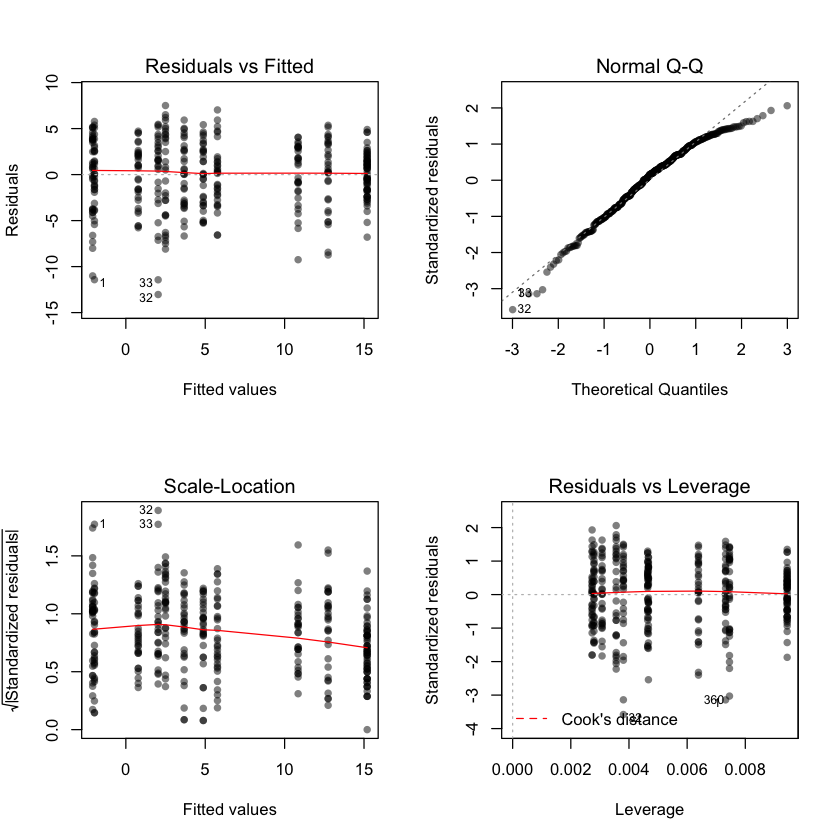

In [184]:
par(mfrow=c(2, 2))
plot(mod1, pch=16, col=rgb(0, 0, 0, 0.5))

In [192]:
preds <- predict(mod1)

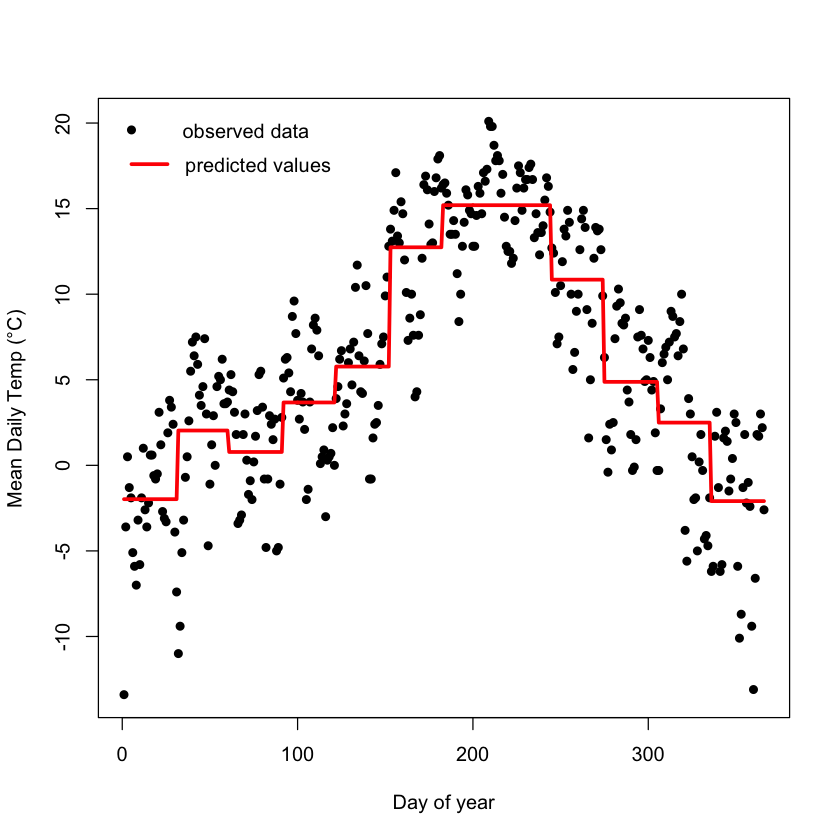

In [193]:
plot(daily$TAVG, pch=16, xlab='Day of year', ylab='Mean Daily Temp (°C)')
lines(preds, col=2, lwd=3)
legend(-5, 21, pch=16, legend='      observed data', bty='n')
legend(-5, 19, lty=1, lwd=3, col=2, legend='predicted values', bty='n')

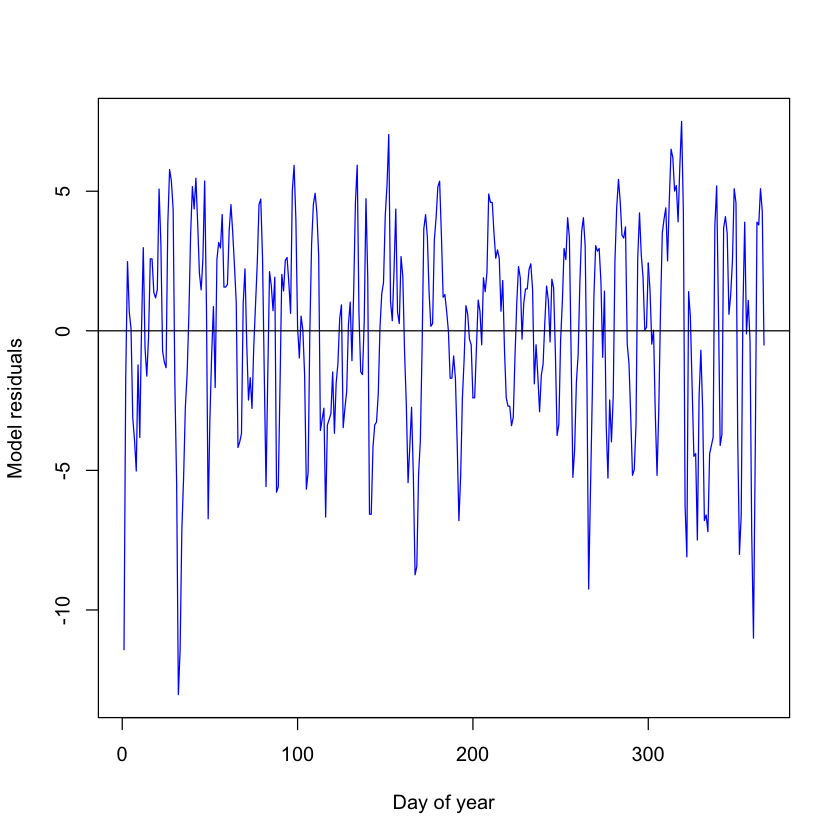

In [194]:
plot(mod1$resid ~ daily$YDAY, 
     type='l', 
     col=4, 
     xlab='Day of year', 
     ylab='Model residuals')
abline(h=0)

Best AR(p): p = 3

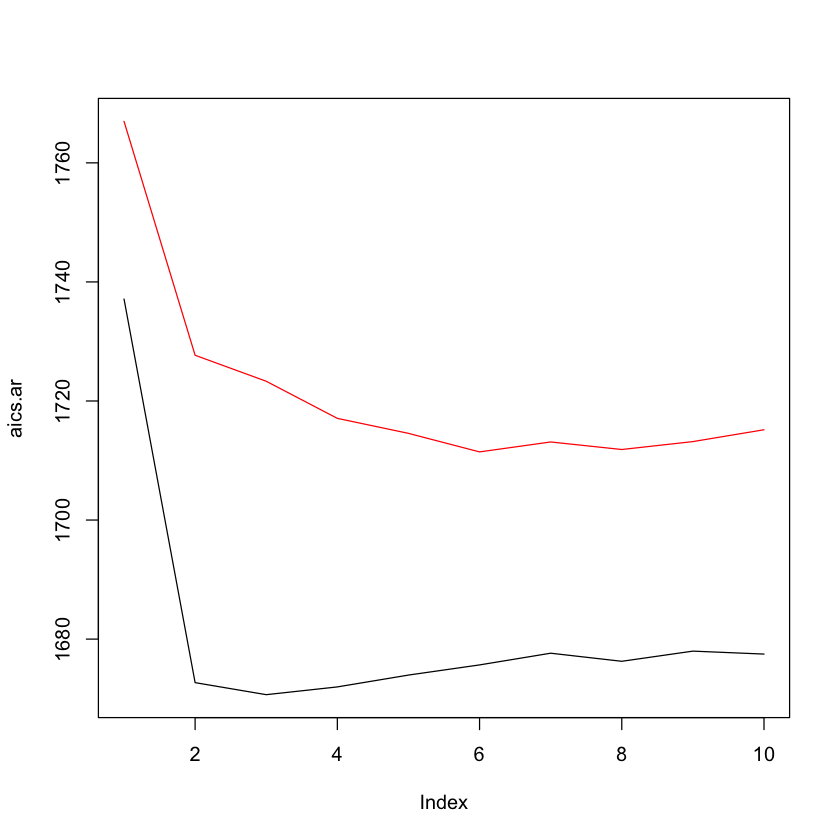

In [195]:
aics.ar <- numeric(10)
aics.ari <- numeric(10)
for (ar in 1:10) {
  ar.mod <- arima(resid(mod1), order=c(ar, 0, 0))
  ari.mod <- arima(resid(mod1), order=c(ar, 1, 0))
  aics.ar[ar] <- ar.mod$aic
  aics.ari[ar] <- ari.mod$aic
}

cat('Best AR(p): p =', which(aics.ar == min(aics.ar)))
plot(aics.ar, type='l', ylim=range(c(aics.ar, aics.ari)))
lines(aics.ari, col=2)

In [196]:
ar3.mod <- arima(resid(mod1), order=c(3, 0, 0))
ar3.mod


Call:
arima(x = resid(mod1), order = c(3, 0, 0))

Coefficients:
         ar1      ar2     ar3  intercept
      1.0561  -0.5244  0.1070    -0.0596
s.e.  0.0530   0.0721  0.0532     0.3371

sigma^2 estimated as 5.454:  log likelihood = -830.33,  aic = 1670.67

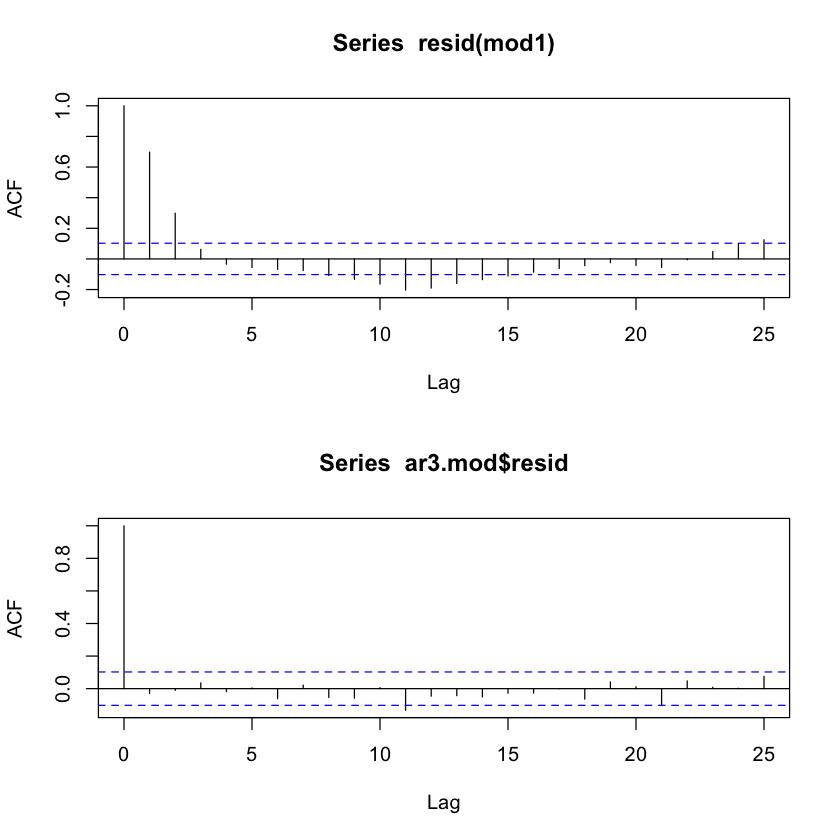

In [197]:
par(mfrow=c(2, 1))
acf(resid(mod1))
acf(ar3.mod$resid)

In [199]:
arima.error <- ar3.mod$resid
mean(arima.error) # should be ~ 0

[1] 0.01955673

In [200]:
sd(arima.error)

[1] 2.338532

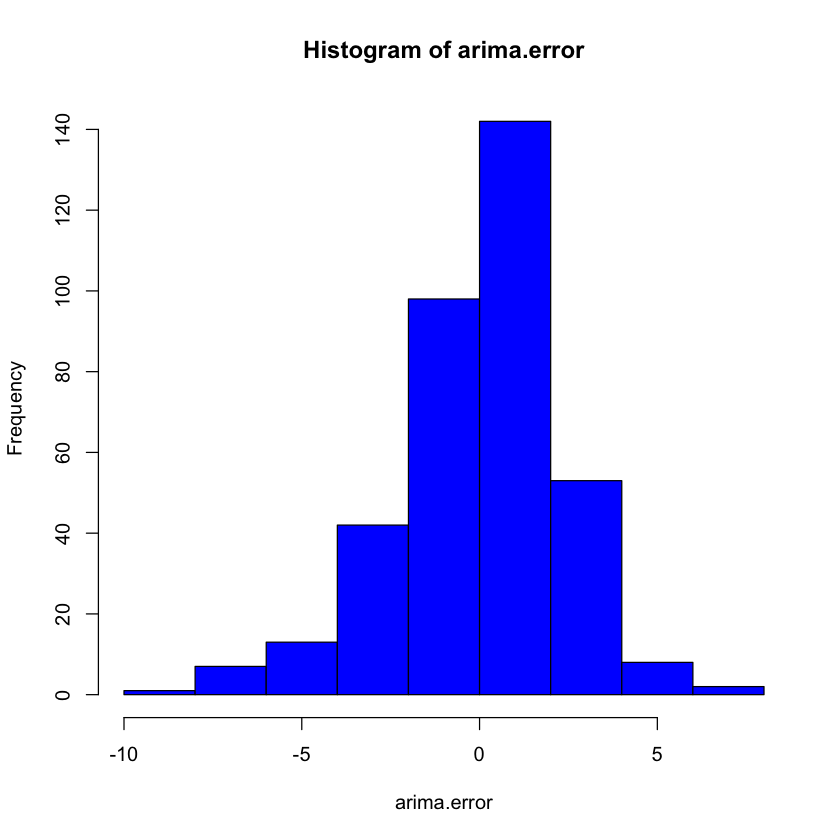

In [202]:
hist(arima.error, col=4)

In [207]:
n <- length(arima.error)
last3 <- arima.error[(n-2):n]
betas <- ar3.mod$coef
betas

ar1         ar2         ar3   intercept 
 1.05608827 -0.52442608  0.10696573 -0.05962577

In [239]:
pseudo.arima.error <- rnorm(n + 3, mean(arima.error), sd(arima.error))
pseudo.resids <- numeric(n + 3)
# use end of year to seed beginning
pseudo.resids[1:3] <- arima.error[(n-2):n] 
for (t in 4:(n + 3)) {
  pseudo.resids[t] <- (betas['intercept'] 
                       + betas['ar1']*pseudo.resids[t - 1]
                       + betas['ar2']*pseudo.resids[t - 2]
                       + betas['ar3']*pseudo.resids[t - 3]
                       + pseudo.arima.error[t])
}

pseudo.resids <- pseudo.resids[-c(1:3)]
length(preds)
length(pseudo.resids)

[1] 366

[1] 366

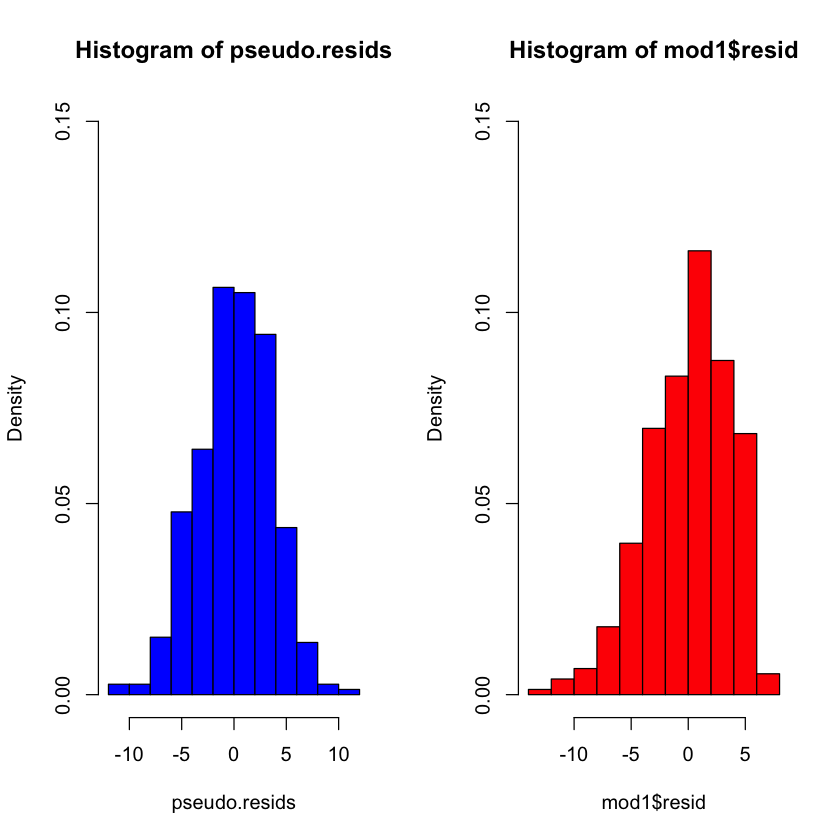

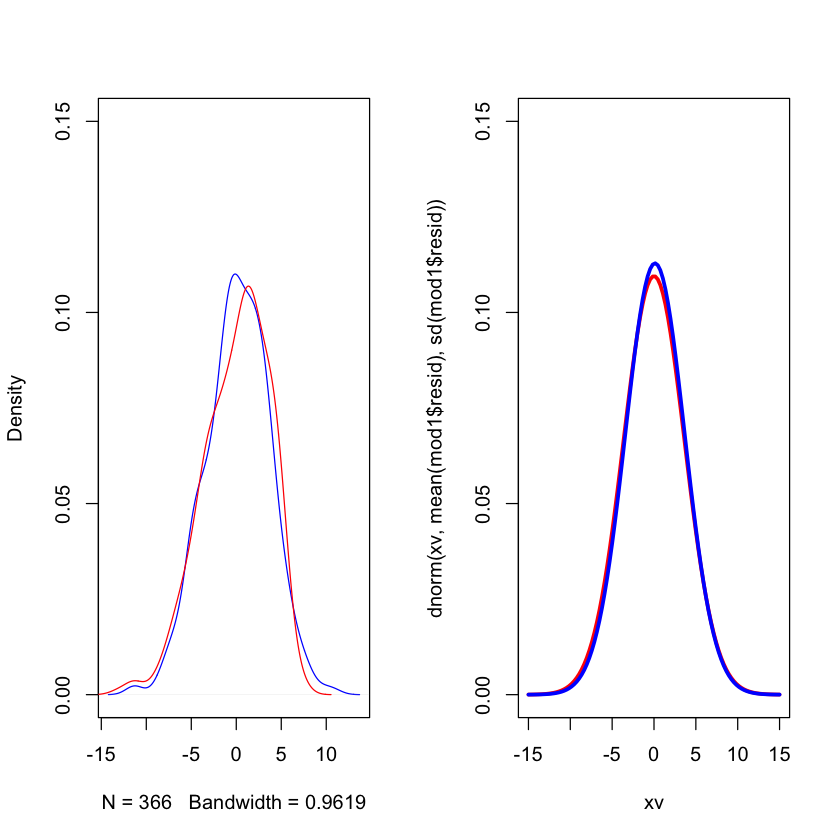

In [240]:
par(mfrow=c(1, 2))
xv <- seq(-15, 15, length=100)
hist(pseudo.resids, col=4, freq=F, ylim=c(0, 0.15))
hist(mod1$resid, col=2, freq=F, ylim=c(0, 0.15))
plot(density(pseudo.resids), col=4, ylim=c(0, 0.15), main='')
lines(density(mod1$resid), col=2)

plot(xv, 
     dnorm(xv, mean(mod1$resid), sd(mod1$resid)), 
     col=2, 
     type='l', 
     lwd=3, 
     ylim=c(0, 0.15))
lines(xv, dnorm(xv, mean(pseudo.resids), sd(pseudo.resids)), col=4, lwd=3)


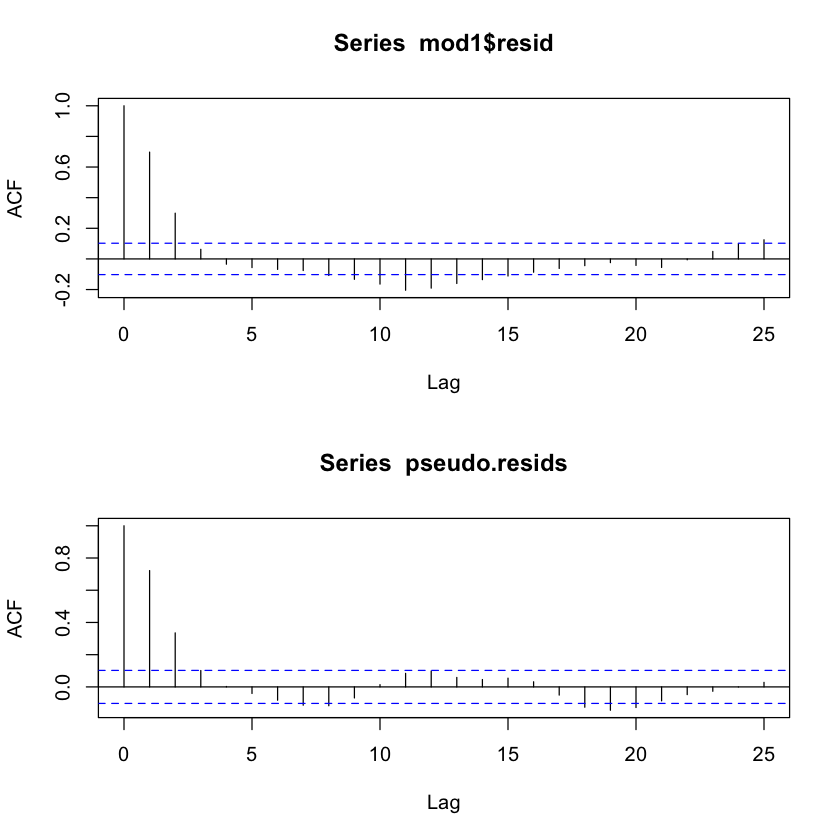

In [241]:
par(mfrow=c(2, 1))
acf(mod1$resid)
acf(pseudo.resids)

In [242]:
pseudo.data <- preds + pseudo.resids

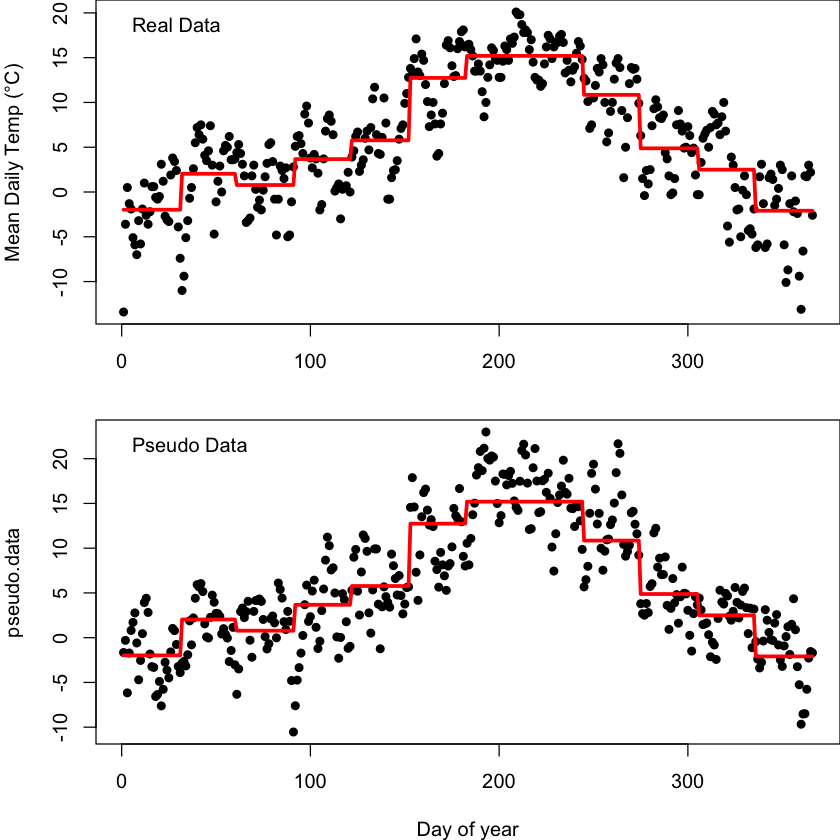

In [258]:
par(mfrow=c(2, 1))
par(mar=c(4, 4, 0, 0))
plot(daily$TAVG, 
     pch=16,  
     ylab='Mean Daily Temp (°C)',
     xlab='')
lines(preds, col=2, lwd=3)
legend('topleft', 'Real Data', bty='n')
plot(pseudo.data, xlab='Day of year', pch=16)
lines(preds, col=2, lwd=3)
legend('topleft', 'Pseudo Data', bty='n')